In [15]:
# %pip install numpy scikit-learn matplotlib keras tensorflow

In [16]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import Input

## Dataset
Geramos uma base de dados artificial chamada circles, composta por 100 pontos em dois círculos concêntricos. Cada ponto foi rotulado em duas classes (azul e vermelho). Esse tipo de base é interessante porque não pode ser separado por um classificador linear simples, exigindo o uso de uma rede neural com camadas escondidas para aprender a fronteira de decisão.

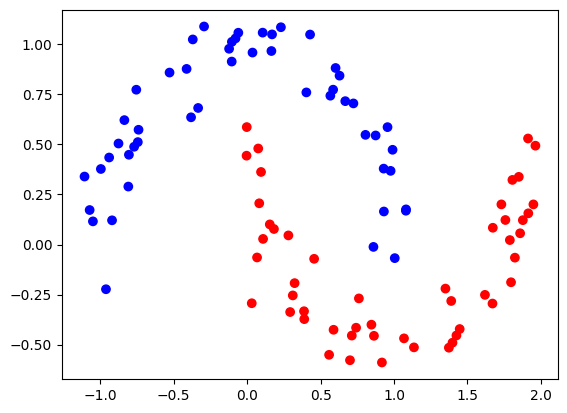

In [17]:
X, Y = datasets.make_moons(100, noise=0.1)

color = ['blue' if k == 0 else 'red' for k in Y]

plt.scatter(X[:, 0], X[:, 1], c=color)
plt.savefig('duas_luas.svg')

## Função de ativação
Essas funções servem para que a rede consiga aprender relações não lineares.

Sem elas, a rede seria apenas uma combinação linear de entradas (como uma regressão linear), incapaz de resolver problemas como o dataset dos círculos.

A sigmoid é comum em camadas de saída binárias, e a tanh é usada em camadas escondidas porque é simétrica em torno de zero (facilita o aprendizado).

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Rede Manual

In [19]:
def run_neural_net(x, w0, b0, b1, w1):
    s00 = w0[0, 0] * x[0]
    s01 = w0[0, 1] * x[1]
    s02 = s00 + s01
    v0 = s02 + b0[0]
    y0 = sigmoid(v0)

    s10 = w0[1, 0] * x[0]
    s11 = w0[1, 1] * x[1]
    s12 = s10 + s11
    v1 = s12 + b0[1]
    y1 = sigmoid(v1)

    s20 = y0 * w1[0]
    s21 = y1 * w1[1]
    s22 = s20 + s21
    v2 = s22 + b1[0]
    y2 = sigmoid(v2)
    return 1 if y2 > 0.5 else 0

In [20]:
def neural_net(x, d, w0, b0, b1, w1):
    # forward

    s00 = w0[0, 0] * x[0]
    s01 = w0[0, 1] * x[1]
    s02 = s00 + s01
    v0 = s02 + b0[0]
    y0 = sigmoid(v0)

    s10 = w0[1, 0] * x[0]
    s11 = w0[1, 1] * x[1]
    s12 = s10 + s11
    v1 = s12 + b0[1]
    y1 = sigmoid(v1)

    s20 = y0 * w1[0]
    s21 = y1 * w1[1]
    s22 = s20 + s21
    v2 = s22 + b1[0]
    y2 = sigmoid(v2)
    #e = y2 - d
    #L = 1/2 * (e ** 2)

    L = -((d*np.log(y2)) + ((1-d)*np.log(1-y2)))


    # backward
    grad_w0 = np.zeros(w0.shape)
    grad_w1 = np.zeros(w1.shape)
    grad_b0 = np.zeros(b0.shape)
    grad_b1 = np.zeros(b1.shape)

    # grad_L = 1
    # grad_e = grad_L * e
    # grad_y2 = grad_e

    grad_y2 = (y2-d)/(y2*(1-y2))
    grad_v2 = grad_y2 * y2 * (1 - y2)
    grad_b1[0] = grad_v2
    grad_s22 = grad_v2
    grad_s21 = grad_s22
    grad_s20 = grad_s22
    grad_w1[1] = grad_s21 * y1
    grad_y1 = grad_s21 * w1[1]

    grad_w1[0] = grad_s20 * y0
    grad_y0 = grad_v2 * w1[0]

    grad_v0 = grad_y0 * y0 * (1 - y0)
    grad_v1 = grad_y1 * y1 * (1 - y1)

    grad_b0[0] = grad_v0
    grad_b0[1] = grad_v1
    grad_s12 = grad_v1
    grad_s02 = grad_v0

    grad_s00 = grad_s02
    grad_s01 = grad_s02
    grad_s10 = grad_s12
    grad_s11 = grad_s12
    grad_w0[0, 0] = grad_s00 * x[0]
    grad_w0[0, 1] = grad_s01 * x[1]
    grad_w0[1, 0] = grad_s10 * x[0]
    grad_w0[1, 1] = grad_s11 * x[1]
    return grad_w0, grad_b0, grad_w1, grad_b1, L

In [21]:
def main():
    # inicialização aleatória
    w0 = np.random.rand(2, 2)
    w1 = np.random.rand(2)
    b0 = np.random.rand(2)
    b1 = np.random.rand(1)

    # taxa de aprendizado
    taxa = 0.1

    acc = 0
    for i in range(100):
        out = run_neural_net(X[i],  w0, b0, b1, w1)
        if out == Y[i]:
            acc += 1
    print(acc, "acurácia antes do treinamento")

    # gradiente descendente
    for i in range(10000):
        loss = 0

        grad_w0 = np.zeros(w0.shape)
        grad_w1 = np.zeros(w1.shape)
        grad_b0 = np.zeros(b0.shape)
        grad_b1 = np.zeros(b1.shape)

        for k in range(100):
            g_w0, g_b0, g_w1, g_b1, L = neural_net(X[k], Y[k], w0, b0, b1, w1)

            grad_w0 += g_w0
            grad_w1 += g_w1
            grad_b0 += g_b0
            grad_b1 += g_b1
            loss += L

        w0 -= taxa * grad_w0
        w1 -= taxa * grad_w1
        b0 -= taxa * grad_b0
        b1 -= taxa * grad_b1

        if i % 1000 == 0:
            print(i, loss)

    # acurácia após o treinamento
    acc = 0
    for i in range(100):
        out = run_neural_net(X[i],  w0, b0, b1, w1)
        if out == Y[i]:
            acc += 1
    print('acc', acc)

    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu'))
    model.add(Dense(5, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate=taxa)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
    #    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(X, Y, epochs=100, verbose=False, batch_size=5)

    acc = model.evaluate(X, Y)


main()

50 acurácia antes do treinamento
0 75.21148260437737
1000 26.161198385157885
2000 26.09053944870473
3000 26.063731584489204
4000 26.5682492162279
5000 26.592076036975588
6000 26.616202620448675
7000 26.630417456553943
8000 26.638642720457426
9000 26.643139561277934
acc 85
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8831 - loss: 0.0826 
